In [4]:
import pandas as pd
import matplotlib
from matplotlib import pylab as plt
import numpy as np

61.33319634703197

In [5]:
df = pd.read_csv('2005-2010_Graduation_Outcomes_-_School_Level.csv')

In [123]:
df2 = pd.read_csv('Archived_DOE_High_School_Directory_2014-2015.csv')
df3 = df2.drop(columns = [i for i in df2.columns if i not in ['dbn','boro']]).rename(columns = {'dbn':'DBN', 'boro':'BORO'})
df_left = df.merge(df3, how='left', on='DBN')
df_left2['BORO'].isnull().sum()

6467

In [6]:
df['BORO'] = [df.loc[i,'DBN'][2] for i in df.index]
df['BORO'].isnull().sum()
#df.groupby('Cohort').Cohort.agg('count')

0

In [7]:
# DON'T RUN TWICE
#df = df[(df.Cohort != '2006')]
#df.loc[ : , 'Cohort'] = df.loc[ : , 'Cohort'].replace('2006 Aug', '2006')

In [8]:
df.groupby('Cohort').Cohort.agg('count')

Cohort
2001    2637
2002    3095
2003    3432
2004    3708
2005    3963
2006    4131
Name: Cohort, dtype: int64

In [79]:
y = df['Total Grads - % of cohort']
X = df.drop(['School Name', 'Total Grads - % of cohort', 'Total Grads - n', 'Total Regents - % of grads', \
             'Advanced Regents - % of grads', 'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort', \
             'Local - % of grads', 'Still Enrolled - n', 'Still Enrolled - % of cohort'], axis = 1)
X

,Demographic,DBN,Cohort,Total Cohort,Total Regents - n,Total Regents - % of cohort,Advanced Regents - n,Advanced Regents - % of cohort,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Dropped Out - n,Dropped Out - % of cohort,BORO
0,Total Cohort,01M292,2003,5,s,NaN,s,NaN,s,NaN,s,NaN,M
1,Total Cohort,01M292,2004,55,17,30.9,0,0.0,17,30.9,3,5.5,M
2,Total Cohort,01M292,2005,64,27,42.2,0,0.0,27,42.2,9,14.1,M
4,Total Cohort,01M292,2006,78,37,47.4,0,0.0,37,47.4,11,14.1,M
5,Total Cohort,01M448,2001,64,32,50.0,7,10.9,25,39.1,6,9.4,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25090,Male,32K564,2002,73,0,0.0,0,0.0,0,0.0,11.0,15.1,K
25091,Male,32K564,2003,65,0,0.0,0,0.0,0,0.0,20.0,30.8,K
25092,Male,32K564,2004,64,0,0.0,0,0.0,0,0.0,22.0,34.4,K
25093,Male,32K564,2005,79,1,1.3,0,0.0,1,1.3,28.0,35.4,K


Text(0.5, 1.0, 'Grad Percent Histogram')

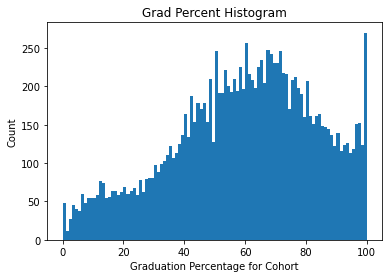

In [6]:
df['Total Grads - % of cohort'].plot.hist(bins = 100)
plt.xlabel('Graduation Percentage for Cohort')
plt.ylabel('Count')
plt.title('Grad Percent Histogram')

Text(0.5, 1.0, 'Droppout % Histogram')

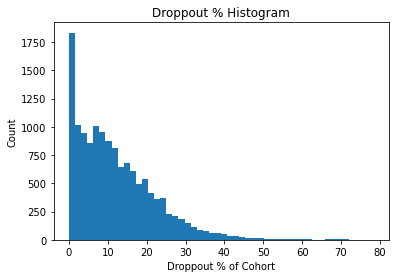

In [15]:
df['Dropped Out - % of cohort'].plot.hist(bins = 50)
plt.xlabel('Droppout % of Cohort')
plt.ylabel('Count')
plt.title('Droppout % Histogram')

Text(0.5, 1.0, 'Total Cohort Histogram')

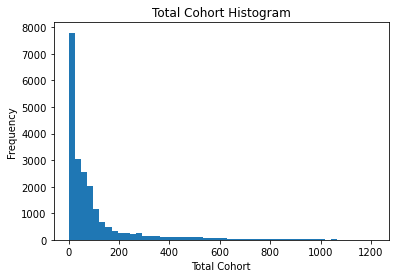

In [16]:
df['Total Cohort'].plot.hist(bins = 50)
plt.xlabel('Total Cohort')
plt.title('Total Cohort Histogram')

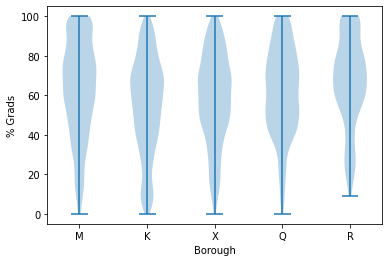

In [117]:
dataset = [df[df['BORO']== b]['Total Grads - % of cohort'].values for b in df['BORO'].unique()]
master = []
for lst in dataset:
    remove_nan = []
    master.append(lst[np.logical_not(np.isnan(lst))])

plt.violinplot(dataset = master)
plt.xticks([1,2,3,4,5],[b for b in df['BORO'].unique()])
#plt.xticks([1,2], ['YES', 'NO'])
plt.ylabel('% Grads')
plt.xlabel('Borough')
plt.show()

In [120]:
df.groupby('BORO')['Total Grads - % of cohort'].agg('mean')

BORO
K    55.038627
M    62.689548
Q    61.415521
R    66.559253
X    57.934429
Name: Total Grads - % of cohort, dtype: float64

In [113]:
df.groupby(['Cohort', 'BORO'])['Total Grads - % of cohort'].agg('mean')

Cohort  BORO
2001    K       46.193600
        M       57.706705
        Q       54.626111
        R       62.784783
        X       47.558419
2002    K       48.695644
        M       58.026190
        Q       56.325266
        R       62.423404
        X       50.143961
2003    K       53.518051
        M       60.208191
        Q       59.006701
        R       66.057609
        X       56.261950
2004    K       56.552074
        M       62.148392
        Q       61.235461
        R       65.505556
        X       59.409877
2005    K       57.308049
        M       65.355050
        Q       63.958537
        R       69.090722
        X       60.198769
2006    K       62.451847
        M       69.640082
        Q       70.049489
        R       73.069072
        X       64.034641
Name: Total Grads - % of cohort, dtype: float64

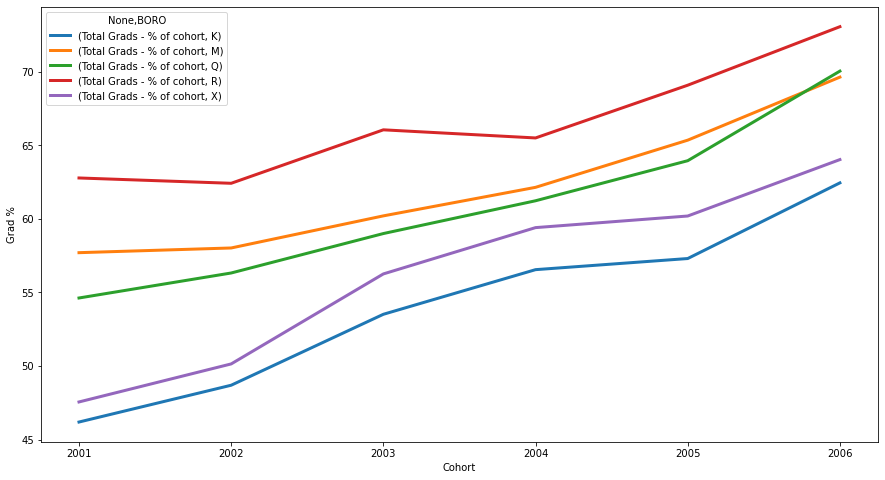

In [121]:
Cohort_Boro = pd.DataFrame(df[['Cohort','BORO', 'Total Grads - % of cohort']].groupby(['Cohort', 'BORO'])\
                           [['BORO', 'Total Grads - % of cohort']].mean().unstack())
Cohort_Boro.plot(figsize = (15,8), linewidth=3)
plt.ylabel('Grad %')
plt.show()
#source -https://www.kaggle.com/rgrajan/time-series-exploratory-data-analysis-forecast

In [213]:
df.groupby('Demographic')['Total Grads - % of cohort'].agg('mean')

Demographic
Asian                          76.717704
Black                          58.556186
English Language Learners      37.473785
English Proficient Students    63.150957
Female                         65.860437
General Education Students     64.279864
Hispanic                       56.976914
Male                           56.428467
Special Education Students     37.951139
Total Cohort                   61.333196
White                          73.788605
Name: Total Grads - % of cohort, dtype: float64

In [229]:
print(df[df['Demographic'] == 'Total Cohort'].groupby('Cohort')['Total Grads - % of cohort'].agg('mean'))
df[df['Demographic'] == 'Total Cohort'].groupby('Cohort')['Total Grads - % of cohort'].agg('var')
#data is non-stationary

Cohort
2001        54.672146
2002        55.531325
2003        59.526978
2004        61.263804
2005        62.764088
2006        63.030423
2006 Aug    67.334921
Name: Total Grads - % of cohort, dtype: float64


Cohort
2001        532.196698
2002        530.590305
2003        494.141688
2004        476.464655
2005        477.839095
2006        453.358303
2006 Aug    432.268857
Name: Total Grads - % of cohort, dtype: float64

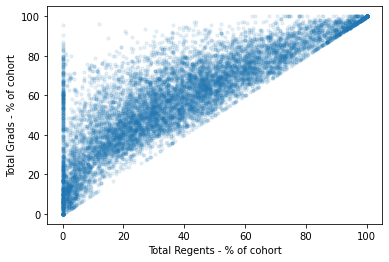

In [309]:
df.plot.scatter('Total Regents - % of cohort', 'Total Grads - % of cohort', s = 10, alpha = .1)

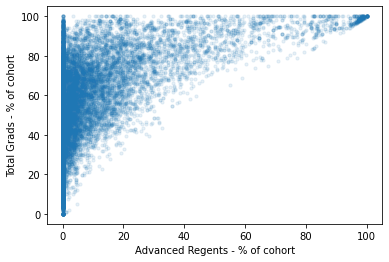

In [85]:
df.plot.scatter('Advanced Regents - % of cohort','Total Grads - % of cohort', s = 10, alpha = .1)

In [ ]:
df.plot.scatter('Advanced Regents - % of cohort','Total Grads - % of cohort', s = 10, alpha = .1)

In [ ]:
df.plot.scatter('Advanced Regents - % of cohort','Total Grads - % of cohort', s = 10, alpha = .1)

In [80]:
X.columns

Index(['Demographic', 'DBN', 'Cohort', 'Total Cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Advanced Regents - n',
       'Advanced Regents - % of cohort', 'Regents w/o Advanced - n',
       'Regents w/o Advanced - % of cohort', 'Dropped Out - n',
       'Dropped Out - % of cohort', 'BORO'],
      dtype='object')

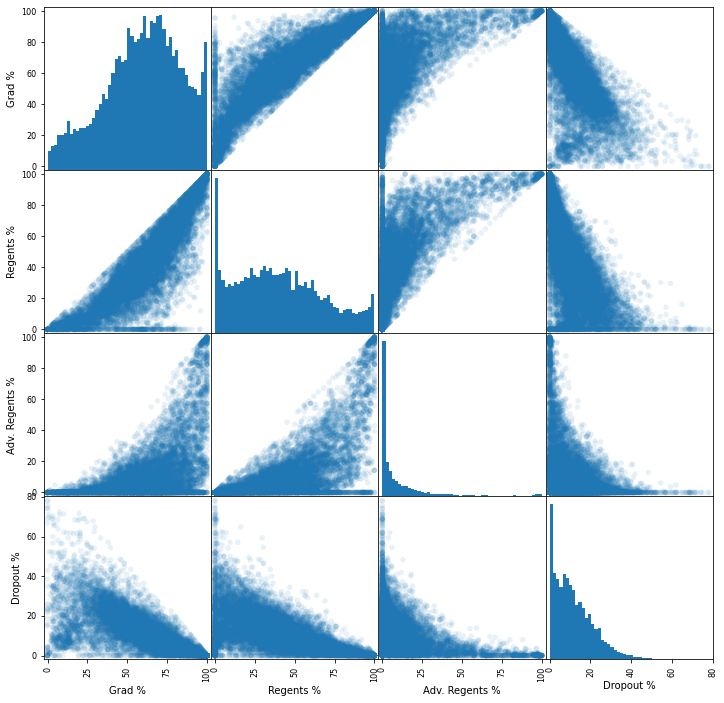

In [108]:
scatter_matrix_df = X = df.drop(['School Name', 'Total Grads - n', 'Total Regents - % of grads', \
             'Advanced Regents - % of grads', 'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort', \
             'Local - % of grads', 'Still Enrolled - n', 'Still Enrolled - % of cohort'], axis = 1)
test = scatter_matrix_df.select_dtypes(float)
test = test.rename(columns={'Total Grads - % of cohort': 'Grad %', 'Total Regents - % of cohort': 'Regents %',\
                           'Advanced Regents - % of cohort': 'Adv. Regents %', 'Regents w/o Advanced - % of cohort': \
                            'Non-Adv Regents %', 'Dropped Out - % of cohort': 'Dropout %'}).drop('Non-Adv Regents %', axis = 1)
pd.plotting.scatter_matrix(test, figsize=(12, 12), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()


In [103]:
test.columns

Index(['Total Grads - % of cohort', 'Total Regents - % of cohort',
       'Advanced Regents - % of cohort', 'Regents w/o Advanced - % of cohort',
       'Dropped Out - % of cohort'],
      dtype='object')